In [2]:
# k nearest neighbor - knn
#--------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\KOWSIK\machine learning\gender_classification_v7.csv")

In [4]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


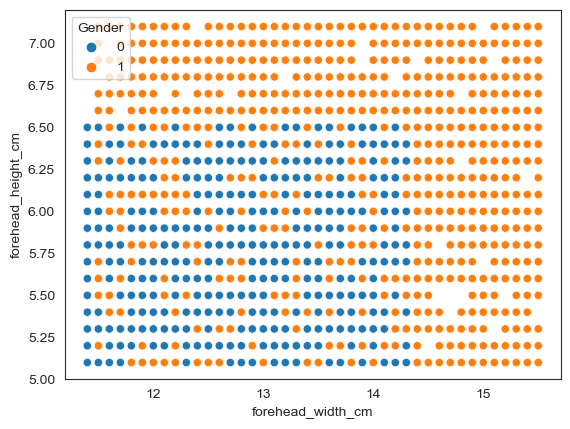

In [5]:
sns.set_style("white")
sns.scatterplot(data=df, x="forehead_width_cm", y="forehead_height_cm", hue="gender")
plt.legend(title="Gender")
plt.show()

(5.0, 6.0)

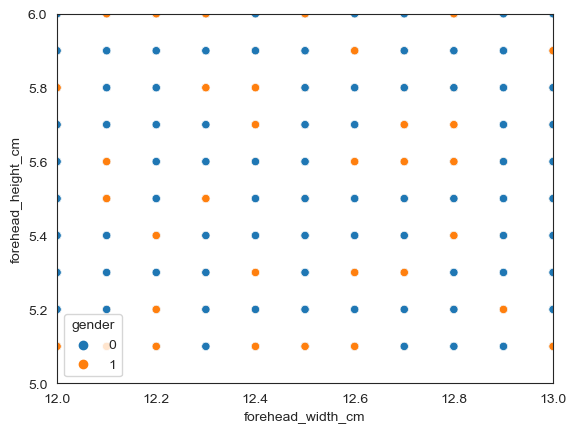

In [6]:
sns.scatterplot(data=df,x='forehead_width_cm',y='forehead_height_cm',hue="gender")
plt.xlim(12,13)
plt.ylim(5.0,6.0)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


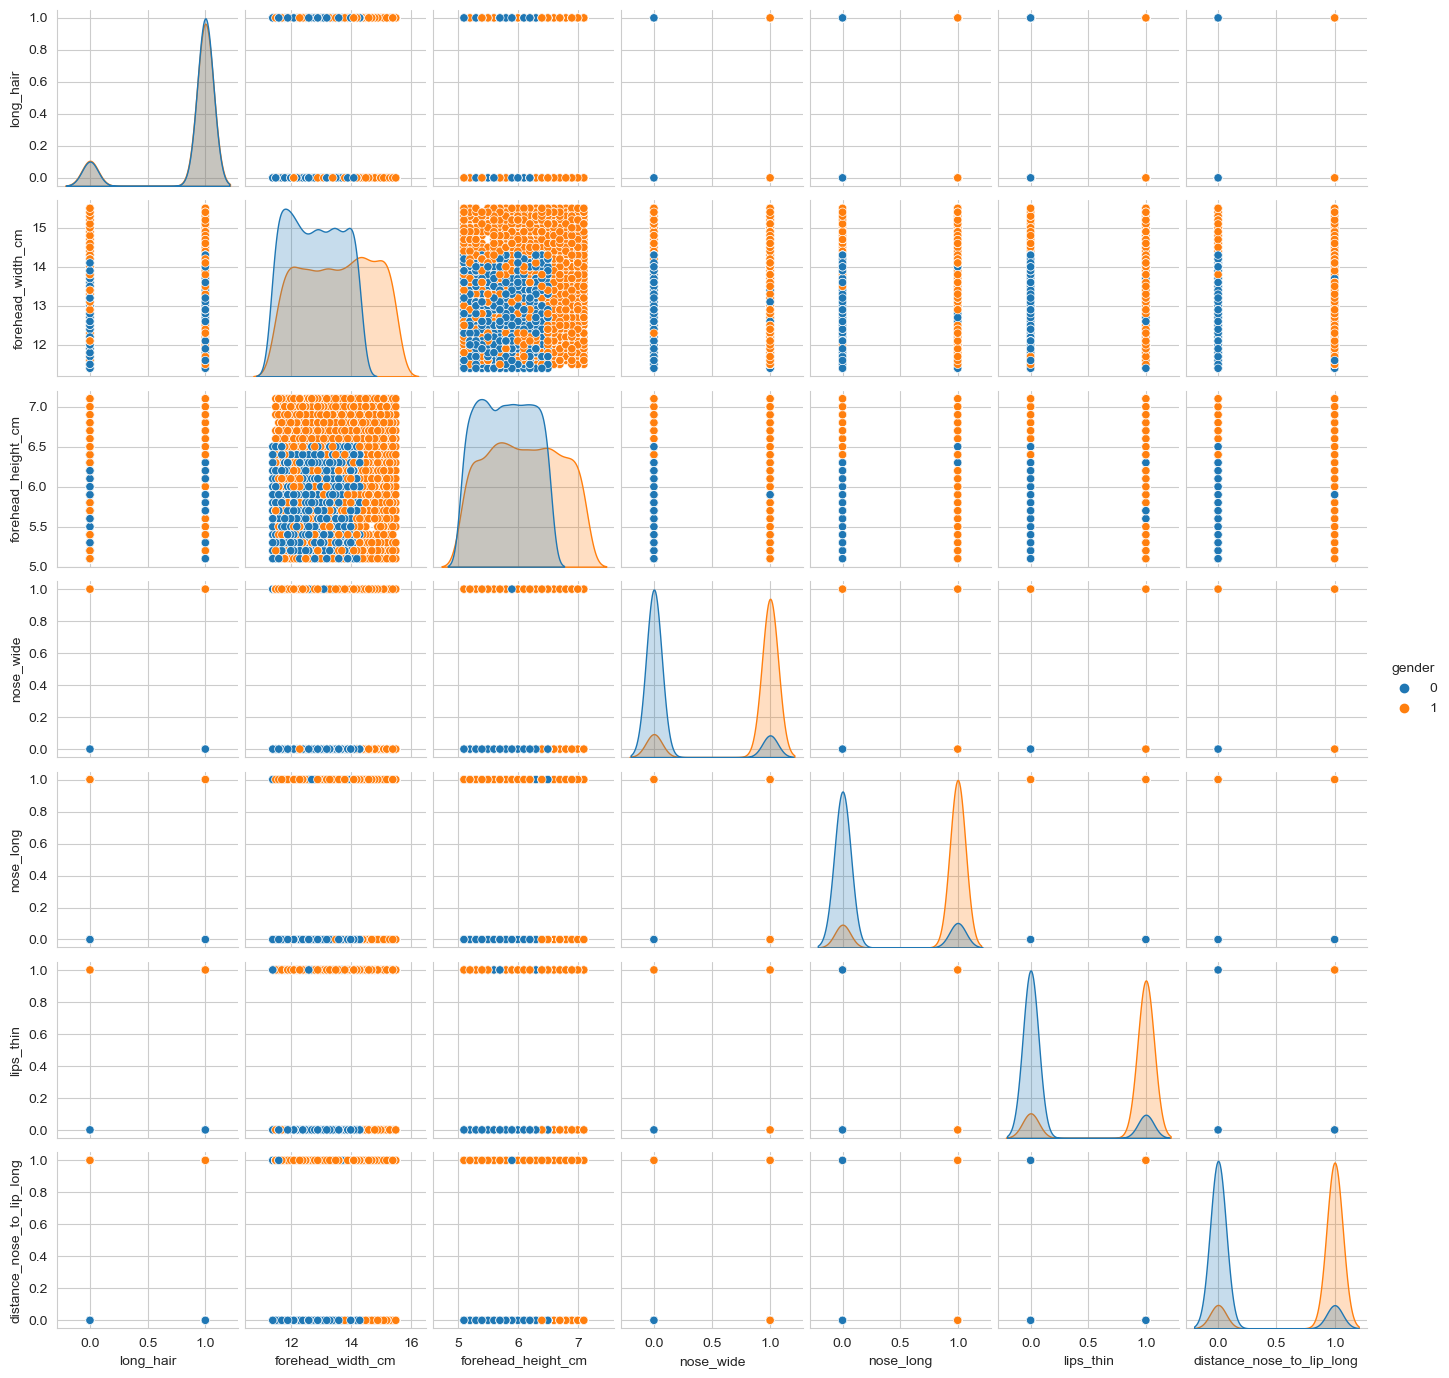

In [7]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="gender",height=2)
plt.show()

In [8]:
# importing sklearn for model selection and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# feature scaling 
X = df[['forehead_width_cm','forehead_height_cm']]
y = df['gender']
print(X.shape)
print(y.shape)

(5001, 2)
(5001,)


In [10]:
# feature engineering ,Data Splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape)
print(y_train.shape)
print('first 10 samples before normalisation:')

print(X.head(10))

print('first 10 training time samples')
print(X_train[:10])


# here, X_train = training input sample
# X_test = testing input sample
# y_train = output cls label for training input samples
# y_test = output cls label for testing input samples

(4000, 2)
(4000,)
first 10 samples before normalisation:
   forehead_width_cm  forehead_height_cm
0               11.8                 6.1
1               14.0                 5.4
2               11.8                 6.3
3               14.4                 6.1
4               13.5                 5.9
5               13.0                 6.8
6               15.3                 6.2
7               13.0                 5.2
8               11.9                 5.4
9               12.1                 5.4
first 10 training time samples
      forehead_width_cm  forehead_height_cm
1708               12.8                 5.8
2456               14.6                 7.0
4372               15.2                 5.7
2976               14.7                 5.3
2643               12.3                 5.6
2320               11.9                 5.9
1965               14.8                 6.8
3640               14.3                 7.0
3979               14.2                 5.1
3604               13

In [11]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(X_train[:5])
print('--------------------------')
print(scaled_X_train[:5])

      forehead_width_cm  forehead_height_cm
1708               12.8                 5.8
2456               14.6                 7.0
4372               15.2                 5.7
2976               14.7                 5.3
2643               12.3                 5.6
--------------------------
[[-0.3393248  -0.26948404]
 [ 1.28542651  1.94280154]
 [ 1.82701028 -0.45384117]
 [ 1.37569047 -1.19126969]
 [-0.7906446  -0.6381983 ]]


In [12]:
# knn Regressor and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40) # here n_neighbors is k 
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [13]:
#prediction
ypre = knn.predict(scaled_X_test)

In [14]:
# for classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [15]:
confusion_matrix(y_test,ypre)

array([[499,   5],
       [244, 253]], dtype=int64)

In [16]:
len(y_test)

1001

In [17]:
print(classification_report(y_test,ypre))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       504
           1       0.98      0.51      0.67       497

    accuracy                           0.75      1001
   macro avg       0.83      0.75      0.74      1001
weighted avg       0.83      0.75      0.74      1001



In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypre)


0.7512487512487512

In [19]:
#error
t=1-accuracy_score(y_test,ypre)
t

0.24875124875124877

In [20]:
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    t=1-accuracy_score(y_test,pred_i)
    error_rate.append(t)
# print(error_rate)

Text(0, 0.5, 'Error Rate')

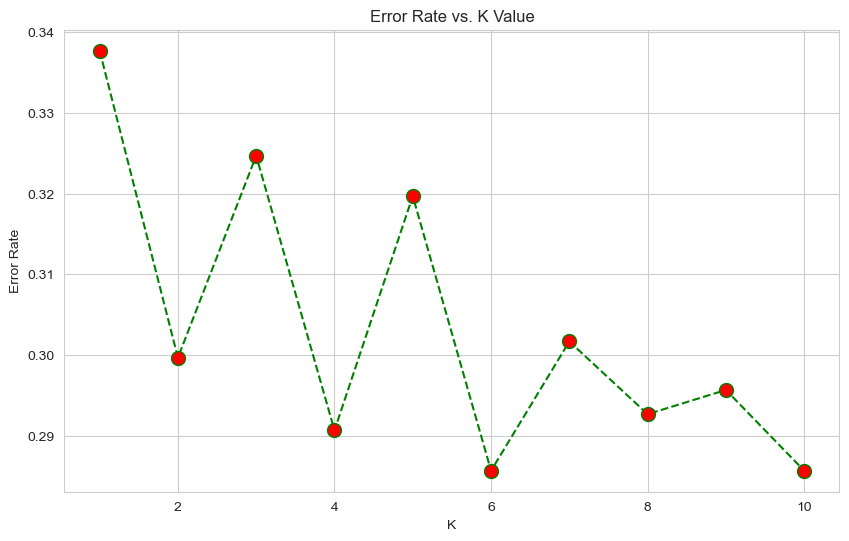

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
# Random Forest:
df[:5]

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [23]:
# feature engineering:

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) # xtrain = training input samples
X_test=ss.transform(X_test) # xtest - testing input samples
print('top 5 training input values - after preprocessing')
print('-------------------------------------------------')
print(X_train[:5])

top 5 training input values - after preprocessing
-------------------------------------------------
[[-0.3393248  -0.26948404]
 [ 1.28542651  1.94280154]
 [ 1.82701028 -0.45384117]
 [ 1.37569047 -1.19126969]
 [-0.7906446  -0.6381983 ]]


In [24]:
from sklearn.ensemble import RandomForestClassifier

clfr=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

clfr1=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

clfr1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypre=clfr.predict(X_test)# entropy ypre calculation

ypre1=clfr1.predict(X_test)# gini ypre calculation

In [27]:
print('entropy Accuracy Score:')
accuracy_score(y_test,ypre)*100

entropy Accuracy Score:


69.63036963036963

In [28]:
print('gini Accuracy Score:')
accuracy_score(y_test,ypre1)*100

gini Accuracy Score:


69.63036963036963

In [29]:
print('entropy - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre))
print('gini - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre1))

entropy - confusion matrix
--------------------

[[405  99]
 [205 292]]
gini - confusion matrix
--------------------

[[405  99]
 [205 292]]


In [30]:
print('entropy result\n--------------')
print(classification_report(y_test,ypre))
print('gini index result\n----------------------')
print(classification_report(y_test,ypre1))

entropy result
--------------
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       504
           1       0.75      0.59      0.66       497

    accuracy                           0.70      1001
   macro avg       0.71      0.70      0.69      1001
weighted avg       0.71      0.70      0.69      1001

gini index result
----------------------
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       504
           1       0.75      0.59      0.66       497

    accuracy                           0.70      1001
   macro avg       0.71      0.70      0.69      1001
weighted avg       0.71      0.70      0.69      1001

